In [2]:
import csv
import pandas as pd
import script.load_data as ld
import script.statistics as stat
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

RANDOM_STATE = 1234

In [3]:
# Load and clean data
df = ld.load_data()

,rischio totale,domanda finanziamento,outstanding,totale finanziato gruppo,totale finanziato,rating bplg,rating bnp,assilea,cerved,nuovo cliente,nuovo gruppo,M12,M13,M14,M15,M16,M17,Z17,BLS,ELS,RD,TS,Cessione Contratto Mandatata,Cessione Contratto Semplice,Credito,"Enveloppe loc, opérations Spé",Enveloppe location Transfert,Enveloppe location immobilier,Locaz. Finanziaria Immobiliare,Locazione Finanziaria,Locazione Operativa,Package credito,Package locazione,Riacquisto di crediti,target
0,101402.08,80000.00,21402.08,0.00,28000.0,6.0,6,0.0,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,20000.00,20000.00,0.00,431900.00,0.0,6.0,6,0.0,6.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,48666.19,24042.20,24623.99,140401.07,25593.4,NaN,6,0.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,31000.00,31000.00,0.00,0.00,0.0,6.0,6,0.0,NaN,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,19000.00,19000.00,0.00,0.00,0.0,7.0,6,0.0,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125701,17286.05,7546.25,9739.80,0.00,0.0,8.0,6,0.0,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
125705,2019.00,2019.00,0.00,0.00,0.0,6.0,6,0.0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
125706,58000.00,58000.00,0.00,0.00,0.0,9.0,6,0.0,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
125801,10058.90,10058.90,0.00,0.00,0.0,7.0,6,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
# Dataset split
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('target', axis=1), df['target'], 
                                                                    test_size=0.2, stratify=df['target'], 
                                                                    random_state=RANDOM_STATE)

In [46]:
# Baseline: Random Forest

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

# Impute our data, then train
X_train_imp = imp.transform(X_train)

# Instantiate model
rfc = RandomForestClassifier(n_estimators=1200, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=None, 
                            random_state=RANDOM_STATE, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

# Train the model on training data
rfc.fit(X_train_imp, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=True, random_state=1234,
                       verbose=0, warm_start=False)

In [1]:
from imblearn.ensemble import BalancedRandomForestClassifier
rfc = BalancedRandomForestClassifier(n_estimators=1200, criterion='gini', bootstrap=True, oob_score=True, n_jobs=None, 
                            random_state=RANDOM_STATE, warm_start=False, class_weight='balanced_subsample')

# Train the model on training data
rfc.fit(X_train_imp, y_train)

NameError: name 'RANDOM_STATE' is not defined

In [5]:
# Proviamo con XGBoost
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

param_dist = {'n_estimators': 500
              ,'learning_rate': 0.03
              ,'subsample': 1
              ,'max_depth': 6
              ,'colsample_bytree': 0.5
              ,'min_child_weight': 1
              , 'scale_pos_weight' : 0.22
             }

xgbc = xgboost.XGBClassifier(objective = 'binary:logistic', **param_dist)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=0.22, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [67]:
missclassified = np.bitwise_xor(xgbc.predict(X_test), y_test.to_numpy())

In [68]:
missclassified = np.array(missclassified, dtype=bool)

In [69]:
proba = xgbc.predict_proba(X_test)

In [70]:
proba

array([[4.6387106e-01, 5.3612894e-01],
       [7.4277401e-01, 2.5722596e-01],
       [6.1415678e-01, 3.8584322e-01],
       ...,
       [2.5458801e-01, 7.4541199e-01],
       [8.0734491e-04, 9.9919266e-01],
       [1.4365780e-01, 8.5634220e-01]], dtype=float32)

In [71]:
prob_miss = proba[missclassified, 1]

In [72]:
prob_miss

array([0.38584322, 0.3569038 , 0.2301944 , ..., 0.318932  , 0.21918775,
       0.47312775], dtype=float32)

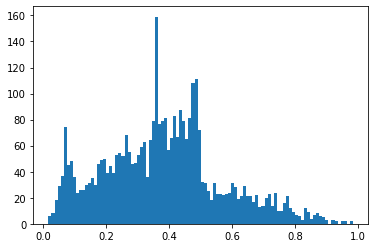

In [74]:
plt.hist(prob_miss, bins=100)
plt.show()

In [124]:
# Proviamo con CatBoost
def deohe(Xt):
    X = Xt.copy()
    
    X[['DMM']] = X[['nuovo cliente']]
    X[['BU']] = X[['nuovo cliente']]
    X[['Prodotto']] = X[['nuovo cliente']]
    for cat in ['M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'Z17']:
        X.loc[X[cat] == 1, ['DMM']] = cat
    X = X.drop(columns = ['M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'Z17'])
    
    
    for cat in ['BLS', 'ELS', 'RD',
       'TS']:
        X.loc[X[cat] == 1, ['BU']] = cat
    X = X.drop(columns = ['BLS', 'ELS', 'RD',
       'TS'])
    
    for cat in ['Cessione Contratto Mandatata', 'Cessione Contratto Semplice',
       'Credito', 'Enveloppe loc, opérations Spé',
       'Enveloppe location Transfert', 'Enveloppe location immobilier',
       'Locaz. Finanziaria Immobiliare', 'Locazione Finanziaria',
       'Locazione Operativa', 'Package credito', 'Package locazione',
       'Riacquisto di crediti']:
        X.loc[X[cat] == 1, ['Prodotto']] = cat
    X = X.drop(columns = ['Cessione Contratto Mandatata', 'Cessione Contratto Semplice',
       'Credito', 'Enveloppe loc, opérations Spé',
       'Enveloppe location Transfert', 'Enveloppe location immobilier',
       'Locaz. Finanziaria Immobiliare', 'Locazione Finanziaria',
       'Locazione Operativa', 'Package credito', 'Package locazione',
       'Riacquisto di crediti'])
    
    return X

In [ ]:
from catboost import CatBoostClassifier
grid = {'learning_rate': 0.03,
        'depth': 6,
        'l2_leaf_reg': 7,
        'iterations': 1000,
        'class_weights' : [1, 0.25]
        }
cbc = CatBoostClassifier(loss_function='Logloss', 
                           cat_features = ['DMM', 'BU', 'Prodotto', 'nuovo cliente', 'nuovo gruppo'],
                           **grid)

cbc.fit(deohe(X_train), y_train)

0:	learn: 0.6799679	total: 45.7ms	remaining: 45.6s
1:	learn: 0.6674737	total: 85.1ms	remaining: 42.5s
2:	learn: 0.6558652	total: 121ms	remaining: 40.1s
3:	learn: 0.6444754	total: 158ms	remaining: 39.5s
4:	learn: 0.6343150	total: 199ms	remaining: 39.6s
5:	learn: 0.6253364	total: 238ms	remaining: 39.4s
6:	learn: 0.6163766	total: 332ms	remaining: 47.1s
7:	learn: 0.6083455	total: 387ms	remaining: 48s
8:	learn: 0.6009313	total: 443ms	remaining: 48.8s
9:	learn: 0.5935247	total: 478ms	remaining: 47.3s
10:	learn: 0.5868557	total: 513ms	remaining: 46.1s
11:	learn: 0.5806570	total: 572ms	remaining: 47.1s
12:	learn: 0.5747081	total: 606ms	remaining: 46s
13:	learn: 0.5692945	total: 653ms	remaining: 46s
14:	learn: 0.5643243	total: 684ms	remaining: 44.9s
15:	learn: 0.5597326	total: 720ms	remaining: 44.3s
16:	learn: 0.5552010	total: 763ms	remaining: 44.1s
17:	learn: 0.5512568	total: 829ms	remaining: 45.2s
18:	learn: 0.5471703	total: 867ms	remaining: 44.8s
19:	learn: 0.5437432	total: 902ms	remaining: 

162:	learn: 0.4621101	total: 7.6s	remaining: 39s
163:	learn: 0.4619897	total: 7.65s	remaining: 39s
164:	learn: 0.4618422	total: 7.7s	remaining: 39s
165:	learn: 0.4617123	total: 7.75s	remaining: 38.9s
166:	learn: 0.4616217	total: 7.8s	remaining: 38.9s
167:	learn: 0.4615323	total: 7.85s	remaining: 38.9s
168:	learn: 0.4614659	total: 7.91s	remaining: 38.9s
169:	learn: 0.4613801	total: 7.96s	remaining: 38.9s
170:	learn: 0.4612965	total: 8.02s	remaining: 38.9s
171:	learn: 0.4612292	total: 8.07s	remaining: 38.9s
172:	learn: 0.4611391	total: 8.12s	remaining: 38.8s
173:	learn: 0.4610344	total: 8.18s	remaining: 38.8s
174:	learn: 0.4609250	total: 8.23s	remaining: 38.8s
175:	learn: 0.4608112	total: 8.28s	remaining: 38.8s
176:	learn: 0.4607157	total: 8.32s	remaining: 38.7s
177:	learn: 0.4606395	total: 8.36s	remaining: 38.6s
178:	learn: 0.4605334	total: 8.4s	remaining: 38.5s
179:	learn: 0.4604271	total: 8.46s	remaining: 38.5s
180:	learn: 0.4603441	total: 8.51s	remaining: 38.5s
181:	learn: 0.4602115	

324:	learn: 0.4510160	total: 15.7s	remaining: 32.5s
325:	learn: 0.4510155	total: 15.7s	remaining: 32.5s
326:	learn: 0.4509542	total: 15.8s	remaining: 32.4s
327:	learn: 0.4509230	total: 15.8s	remaining: 32.4s
328:	learn: 0.4508925	total: 15.8s	remaining: 32.3s
329:	learn: 0.4508484	total: 15.9s	remaining: 32.3s
330:	learn: 0.4508058	total: 15.9s	remaining: 32.2s
331:	learn: 0.4507824	total: 16s	remaining: 32.1s
332:	learn: 0.4507424	total: 16s	remaining: 32.1s
333:	learn: 0.4507303	total: 16.1s	remaining: 32s
334:	learn: 0.4506621	total: 16.1s	remaining: 32s
335:	learn: 0.4506396	total: 16.2s	remaining: 32s
336:	learn: 0.4506292	total: 16.2s	remaining: 31.9s
337:	learn: 0.4505899	total: 16.3s	remaining: 31.9s
338:	learn: 0.4505533	total: 16.4s	remaining: 31.9s
339:	learn: 0.4505103	total: 16.4s	remaining: 31.9s
340:	learn: 0.4504763	total: 16.5s	remaining: 31.9s
341:	learn: 0.4504499	total: 16.6s	remaining: 31.9s
342:	learn: 0.4504187	total: 16.6s	remaining: 31.8s
343:	learn: 0.4503647	

487:	learn: 0.4452115	total: 25.5s	remaining: 26.8s
488:	learn: 0.4451702	total: 25.6s	remaining: 26.8s
489:	learn: 0.4451175	total: 25.7s	remaining: 26.7s
490:	learn: 0.4450793	total: 25.7s	remaining: 26.7s
491:	learn: 0.4450481	total: 25.8s	remaining: 26.6s
492:	learn: 0.4450252	total: 25.9s	remaining: 26.6s
493:	learn: 0.4449926	total: 25.9s	remaining: 26.6s
494:	learn: 0.4449912	total: 26s	remaining: 26.5s


In [126]:
import numpy as np
class MixEstimator():
    def __init__(self, est1, est2, est3):
        self.est1 = est1
        self.est2 = est2
        self.est3 = est3
    def predict_proba(self, X):
        return np.mean(np.dstack((self.est1.predict_proba(X), self.est2.predict_proba(deohe(X)), self.est3.predict_proba(SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)))), axis = 2)
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
for model, X in [(rfc, SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_test)),
                 (xgbc, X_test),
                 (cbc, deohe(X_test)),
                 (MixEstimator(xgbc, cbc, rfc), X_test)]:
    print(model.__class__.__name__)
    print(balanced_accuracy_score(y_test, model.predict(X), adjusted=True))
    

XGBClassifier
0.5622159257466652


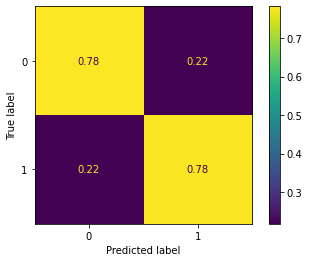

In [50]:
from sklearn.metrics import balanced_accuracy_score, plot_confusion_matrix
model = xgbc
print(model.__class__.__name__)
print(balanced_accuracy_score(y_test, model.predict(X_test), adjusted=True))
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.show()

BalancedRandomForestClassifier


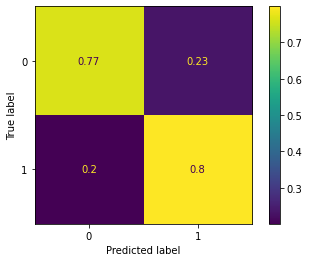

XGBClassifier


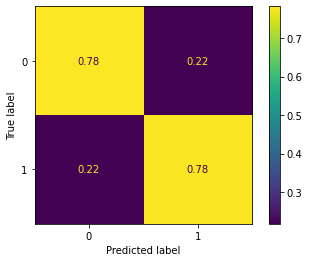

CatBoostClassifier


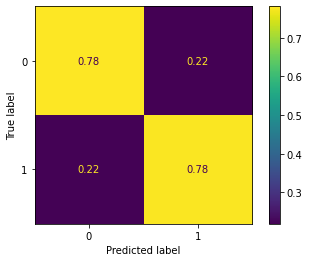

MixEstimator


ValueError: plot_confusion_matrix only supports classifiers

In [128]:
from sklearn.metrics import accuracy_score
for model, X in [(rfc, SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X_test)),
                 (xgbc, X_test),
                 (cbc, deohe(X_test)),
                 (MixEstimator(xgbc, cbc, rfc), X_test)]:
    print(model.__class__.__name__)
    plot_confusion_matrix(model, X, y_test, normalize='true')
    plt.show()

In [34]:
from sklearn.utils import resample
df_majority = df[df.target==1]
df_minority = df[df.target==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=17000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.target.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

1    17000
0    16713
Name: target, dtype: int64

In [35]:
df = df_downsampled